# **🍽️ Restaurant Tips Analysis**

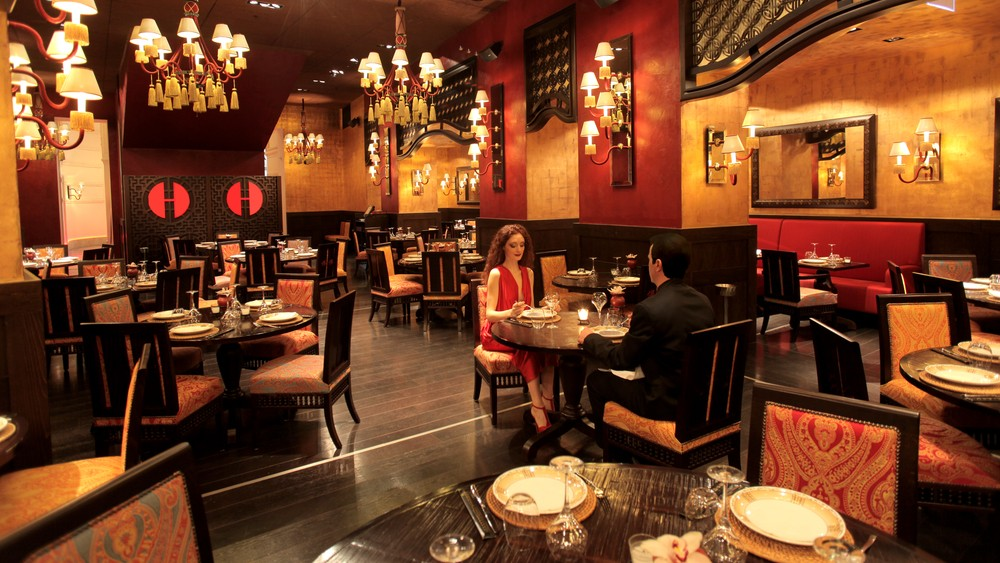

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')


### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
df.head()


,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

In [ ]:
df.isnull().sum()

,0
id,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
df.duplicated().sum()

0

Show the columns of the dataframe and their types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

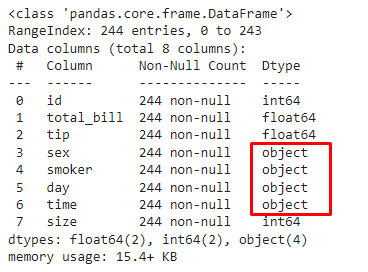

Let's fix their types and make them string:

Check again (output columns and their types):

In [ ]:
df=df.convert_dtypes()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
df.describe()


,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
smokers_df = df[df['smoker'] == 'Yes']



Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
213,213,13.27,2.5,Female,Yes,Sat,Dinner,2
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2
204,204,20.53,4.0,Male,Yes,Thur,Lunch,4
76,76,17.92,3.08,Male,Yes,Sat,Dinner,2
173,173,31.85,3.18,Male,Yes,Sun,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
non_smokers_df =df[df['smoker']=='No']


Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
non_smokers_df.sample(5)


,id,total_bill,tip,sex,smoker,day,time,size
163,163,13.81,2.0,Male,No,Sun,Dinner,2
155,155,29.85,5.14,Female,No,Sun,Dinner,5
23,23,39.42,7.58,Male,No,Sat,Dinner,4
53,53,9.94,1.56,Male,No,Sun,Dinner,2
16,16,10.33,1.67,Female,No,Sun,Dinner,3


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
common_tip_min=df['tip'].min()
common_tip_max=df['tip'].max()
common_tip_mean=df['tip'].mean()
common_tip_median=df['tip'].median()


Let's show the resulting values for whole dataset:

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean,common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
smokers_tip_min=smokers_df['tip'].min()
smokers_tip_max=smokers_df['tip'].max()
smokers_tip_mean=smokers_df['tip'].mean()
smokers_tip_median=smokers_df['tip'].median()


Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
smoker_values=[smokers_tip_min,smokers_tip_max,smokers_tip_mean,smokers_tip_median]
smoker_values=map(lambda x:round(x,4),smoker_values)
smoker_mct=pd.DataFrame(smoker_values,index=['min','max','mean','median'])
smoker_mct


,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
non_smokers_tip_min=non_smokers_df['tip'].min()
non_smokers_tip_max=non_smokers_df['tip'].max()
non_smokers_tip_mean=non_smokers_df['tip'].mean()
non_smokers_tip_median=non_smokers_df['tip'].median()


Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
non_smoker_values=[non_smokers_tip_min,non_smokers_tip_max,non_smokers_tip_mean,non_smokers_tip_median]
non_smoker_values=map(lambda x:round(x,4),non_smoker_values)
non_smoker_mct=pd.DataFrame(non_smoker_values,index=['min','max','mean','median'])
non_smoker_mct


,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

Based on the measure :
1.   The max tip value is belong smokers group. It's 10USD
2.   The average tip value: The smokers is higher than non-smokers

**General conclusion:**
**The smokers usually give tip higher non-smokers**

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

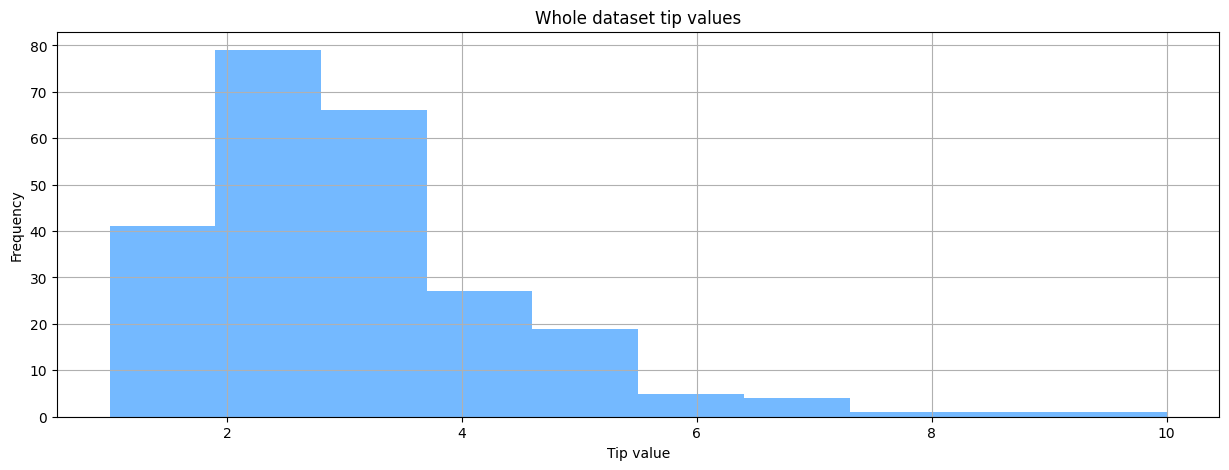

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    df['tip'],
    bins=10,
    color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()


##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

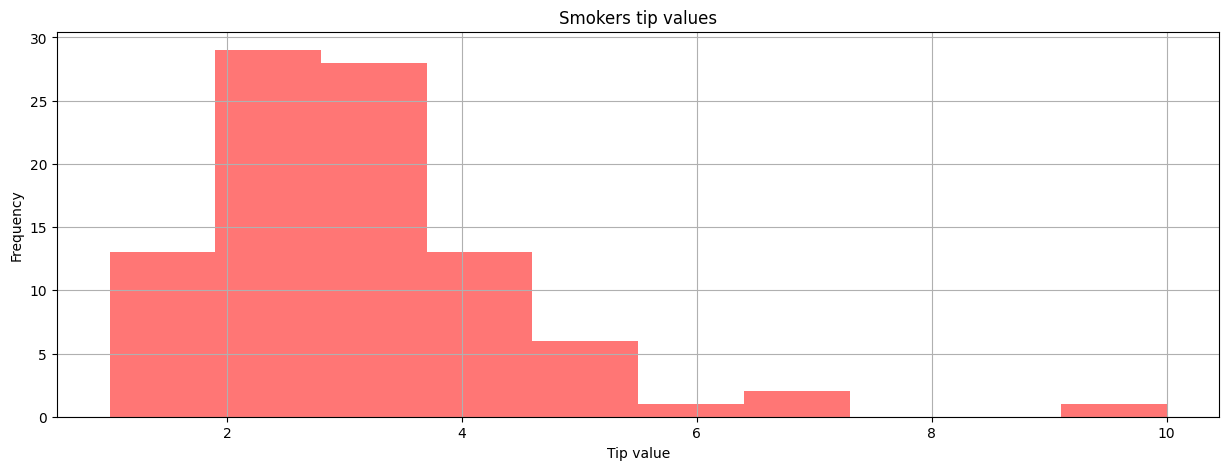

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    smokers_df['tip'],
    bins=10,
    color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()


##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

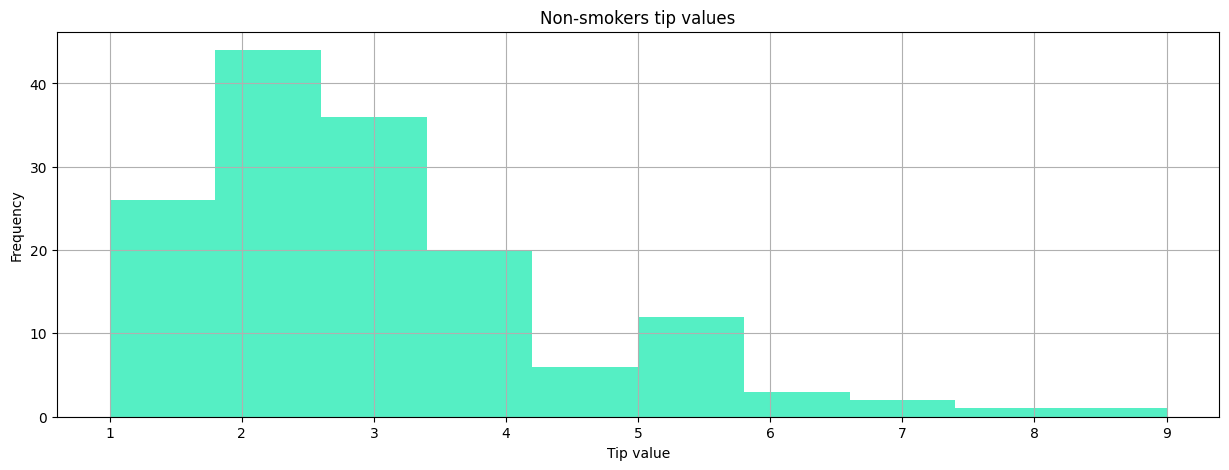

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    non_smokers_df['tip'],
    bins=10,
    color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

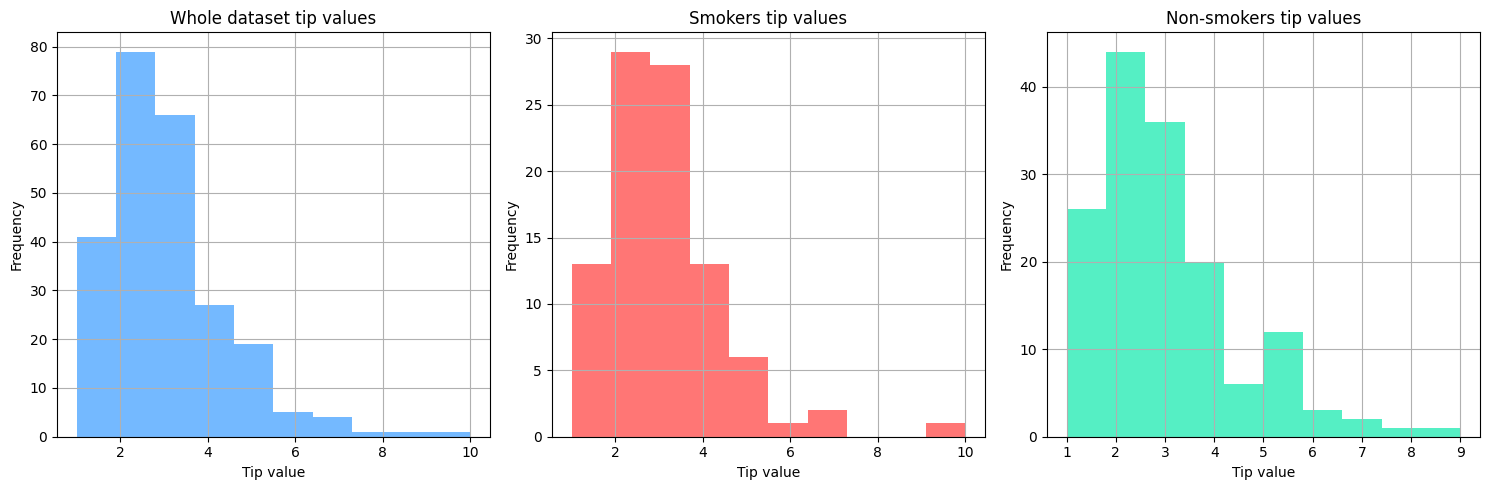

In [ ]:
# prompt: plot all 3 charts in a row

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['tip'], bins=10, color='#74b9ff')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Whole dataset tip values')
axes[0].grid(True)

axes[1].hist(smokers_df['tip'], bins=10, color='#ff7675')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Smokers tip values')
axes[1].grid(True)

axes[2].hist(non_smokers_df['tip'], bins=10, color='#55efc4')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Non-smokers tip values')
axes[2].grid(True)

plt.tight_layout()
plt.show()


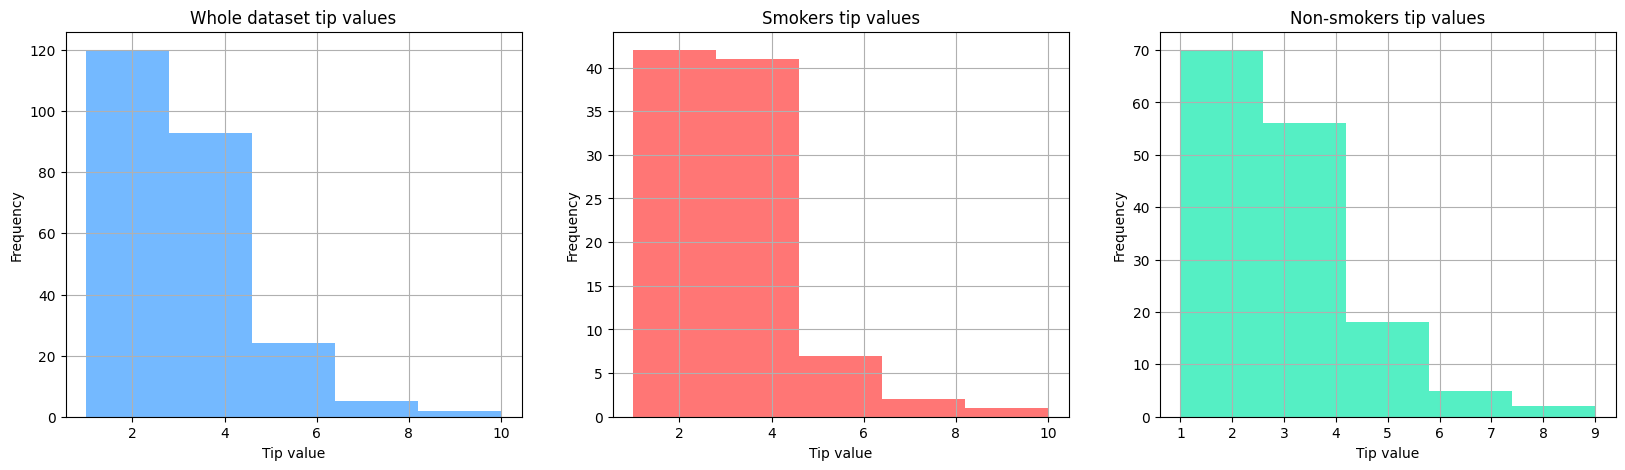

In [ ]:
figure, axis = plt.subplots(1,3,figsize=(20,5))
axis[0].hist(df['tip'],bins=5,color='#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[1].hist(smokers_df['tip'],bins=5,color='#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)
axis[2].hist(non_smokers_df['tip'],bins=5,color='#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)
plt.show()



In [ ]:
import scipy.stats as st
import numpy as np
data_group1=smokers_df['tip']
data_group2=non_smokers_df['tip']
st.ttest_ind(data_group1,data_group2,equal_var=True)

TtestResult(statistic=0.09222805186888201, pvalue=0.9265931522244976, df=242.0)

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

Based on the T-test between smokers and non-smokers, we have the result is pvalue = 0.926 > 0.05. We can conclude that these two customer groups do not have much difference in the amount of money tipped to the restaurant's service staff.


**General conclusion:**

Through the calculation table of min, max, median parameters and the distribution image, we can see that: The average tip amount is 2.9 USD. The highest tip amount is 10 USD. The smokers group give tip more than non_smokers. But there isn't significant difference .
Amount tip from 1 USD - 2.5 USD that is amount for restaurant staff receive the most.


### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [ ]:
female_df=df[df['sex']=='Female']
female_df.sample(5)


,id,total_bill,tip,sex,smoker,day,time,size
188,188,18.15,3.5,Female,Yes,Sun,Dinner,3
11,11,35.26,5.0,Female,No,Sun,Dinner,4
67,67,3.07,1.0,Female,Yes,Sat,Dinner,1
143,143,27.05,5.0,Female,No,Thur,Lunch,6
155,155,29.85,5.14,Female,No,Sun,Dinner,5


In [ ]:
male_df=df[df['sex']=='Male']
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
184,184,40.55,3.0,Male,Yes,Sun,Dinner,2
26,26,13.37,2.0,Male,No,Sat,Dinner,2
75,75,10.51,1.25,Male,No,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2
160,160,21.5,3.5,Male,No,Sun,Dinner,4


In [ ]:
female_tip_min=female_df['tip'].min()
female_tip_max=female_df['tip'].max()
female_tip_mean=female_df['tip'].mean()
female_tip_median=female_df['tip'].median()

In [ ]:
female_values=[female_tip_min,female_tip_max,female_tip_mean,female_tip_median]
female_values=map(lambda x:round(x,4),female_values)
female_mct=pd.DataFrame(female_values,index=['min','max','mean','median'])
female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [ ]:
male_tip_min=male_df['tip'].min()
male_tip_max=male_df['tip'].max()
male_tip_mean=male_df['tip'].mean()
male_tip_median=male_df['tip'].median()

In [ ]:
male_values=[male_tip_min,male_tip_max,male_tip_mean,male_tip_median]
male_values=map(lambda x:round(x,4),male_values)
male_mct=pd.DataFrame(male_values,index=['min','max','mean','median'])
male_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'female': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median},
    'male': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,female,male
min,1.000000,1.000000,1.000000
max,10.000000,6.500000,10.000000
mean,2.998279,2.833448,3.089618
median,2.900000,2.750000,3.000000


##### **📝 Conclusion**

**Insights based on measures of central tendency comparison:**

---
Based on the measure :
1.   The max tip value is belong male. It's 10USD
2.   The average tip value: male is higher than female
**General conclusion:**
**The male usually give tip higher female**

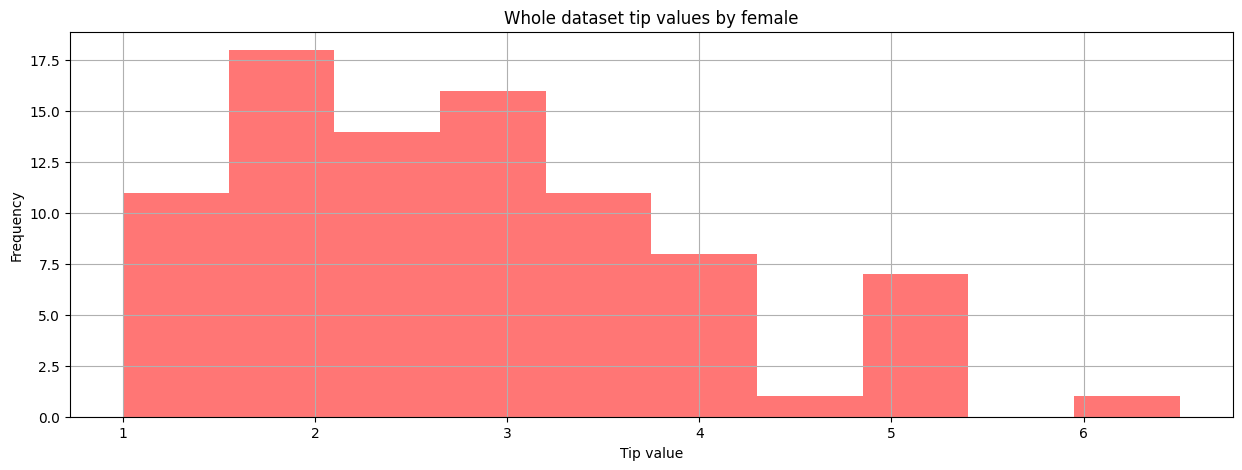

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    female_df['tip'],
    bins=10,
    color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values by female')
plt.grid(True)

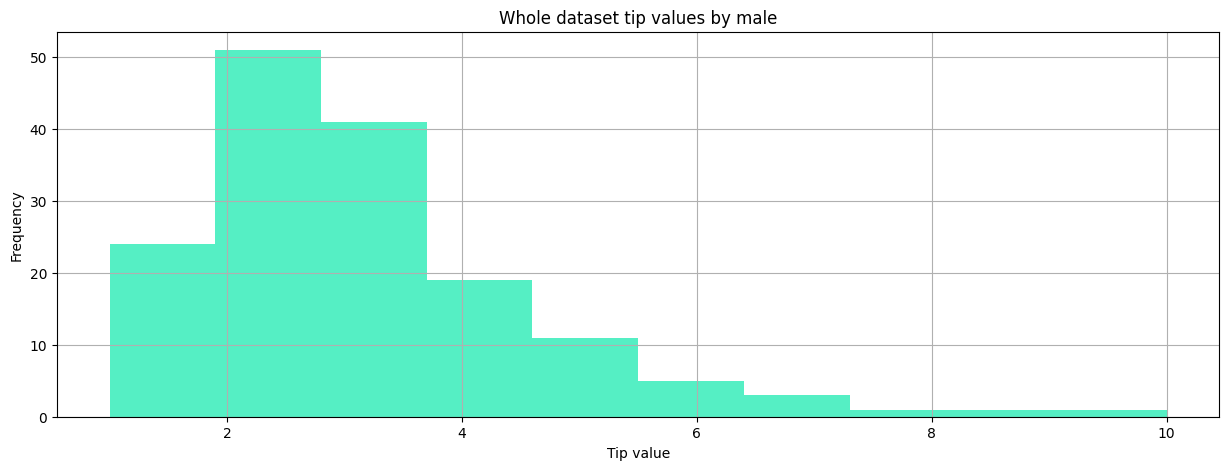

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    male_df['tip'],
    bins=10,
    color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values by male')
plt.grid(True)

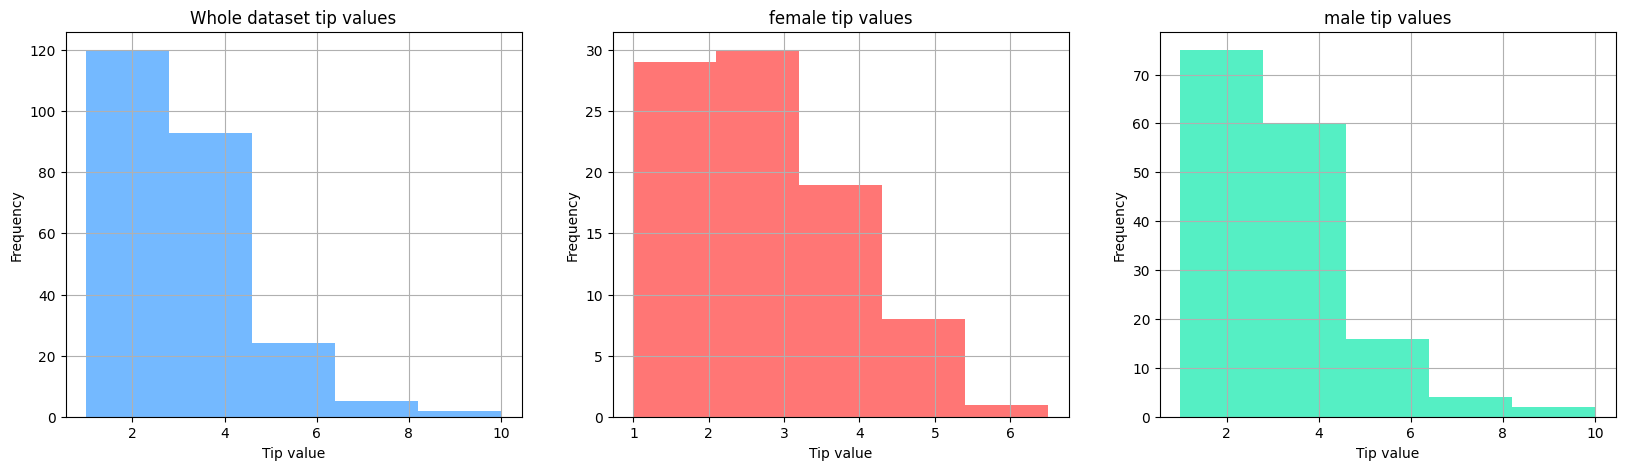

In [ ]:
figure, axis = plt.subplots(1,3,figsize=(20,5))
axis[0].hist(df['tip'],bins=5,color='#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[1].hist(female_df['tip'],bins=5,color='#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('female tip values')
axis[1].grid(True)
axis[2].hist(male_df['tip'],bins=5,color='#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('male tip values')
axis[2].grid(True)
plt.show()

In [ ]:
data_group1=female_df['tip']
data_group2=male_df['tip']
st.ttest_ind(data_group1,data_group2,equal_var=True)

TtestResult(statistic=-1.387859705421269, pvalue=0.16645623503456755, df=242.0)

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---
Based on the T-test between male and female, we have the result that pvalue = 0.16 > 0.05. We can conclude that these two groups of customers do not have much difference in the amount of tips for restaurant's service staff.

**General conclusion:**

Through the table of min, max, average parameters and the distribution image, we see that: The male give tip more than female.But there isn't significant difference







### **📆 Do weekends bring more tips?**

In [ ]:
weekends_df=df[df['day'].isin(['Sat','Sun'])]
weekends_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
17,17,16.29,3.71,Male,No,Sun,Dinner,3
24,24,19.82,3.18,Male,No,Sat,Dinner,2
230,230,24.01,2.0,Male,Yes,Sat,Dinner,4
210,210,30.06,2.0,Male,Yes,Sat,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2


Perform the same steps based on the column **day**.

In [ ]:
weekeds_tip_min=weekends_df['tip'].min()
weekeds_tip_max=weekends_df['tip'].max()
weekeds_tip_mean=weekends_df['tip'].mean()
weekeds_tip_median=weekends_df['tip'].median()

In [ ]:
weekends_values=[weekeds_tip_min,weekeds_tip_max,weekeds_tip_mean,weekeds_tip_median]
weekends_values=map(lambda x:round(x,4),weekends_values)
weekends_mct=pd.DataFrame(weekends_values,index=['min','max','mean','median'])
weekends_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


In [ ]:
weekdays_df=df[df['day'].isin(['Mon','Tue','Wed','Thu','Fri'])]
weekdays_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
94,94,22.75,3.25,Female,No,Fri,Dinner,2
98,98,21.01,3.0,Male,Yes,Fri,Dinner,2
101,101,15.38,3.0,Female,Yes,Fri,Dinner,2
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1
90,90,28.97,3.0,Male,Yes,Fri,Dinner,2


In [ ]:
weekdays_tip_min=weekdays_df['tip'].min()
weekdays_tip_max=weekdays_df['tip'].max()
weekdays_tip_mean=weekdays_df['tip'].mean()
weekdays_tip_median=weekdays_df['tip'].median()

In [ ]:
weekdays_values=[weekdays_tip_min,weekdays_tip_max,weekdays_tip_mean,weekdays_tip_median]
weekdays_values=map(lambda x:round(x,4),weekdays_values)
weekdays_mct=pd.DataFrame(weekdays_values,index=['min','max','mean','median'])
weekdays_mct

,0
min,1.0000
max,4.7300
mean,2.7347
median,3.0000


In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekends': {'min': weekeds_tip_min, 'max': weekeds_tip_max, 'mean': weekeds_tip_mean, 'median': weekeds_tip_median},
    'Weekdays': {'min': weekdays_tip_min, 'max': weekdays_tip_max, 'mean': weekdays_tip_mean, 'median': weekdays_tip_median}
}
all_mct = pd.DataFrame(all_vals_dict)
all_mct

,Common,Weekends,Weekdays
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,4.730000
mean,2.998279,3.115276,2.734737
median,2.900000,3.000000,3.000000


##### **📝 Conclusion**

**Insights based on measures of central tendency comparison:**

---
Based on the measure :
1.   The max tip value is on Weekends. It's 10USD
2.   The average tip value: The weekends is higher than weekdays
**General conclusion:**
**The weekends usually give tip higher weekdays**

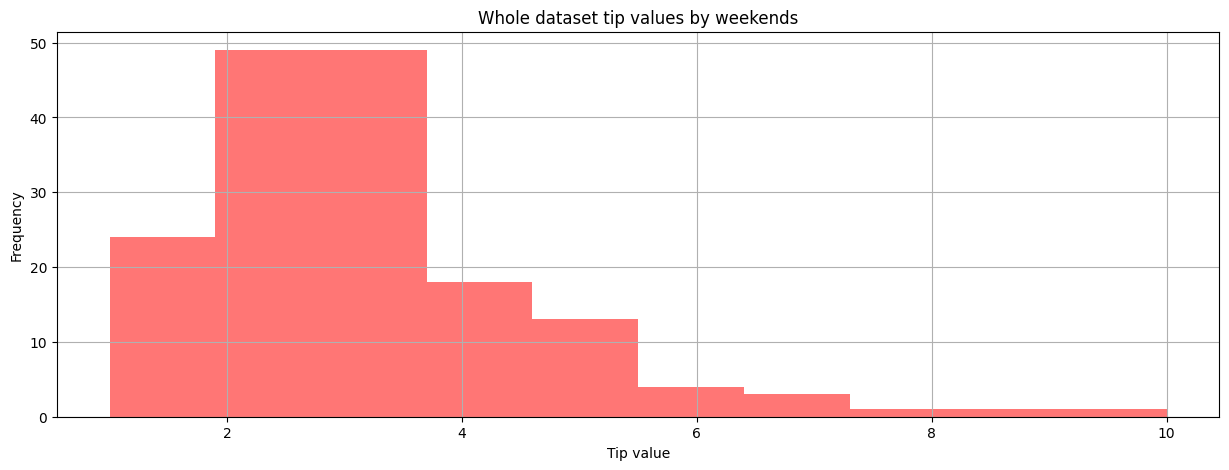

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    weekends_df['tip'],
    bins=10,
    color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values by weekends')
plt.grid(True)

Text(0.5, 1.0, 'Whole dataset tip values by weekdays')

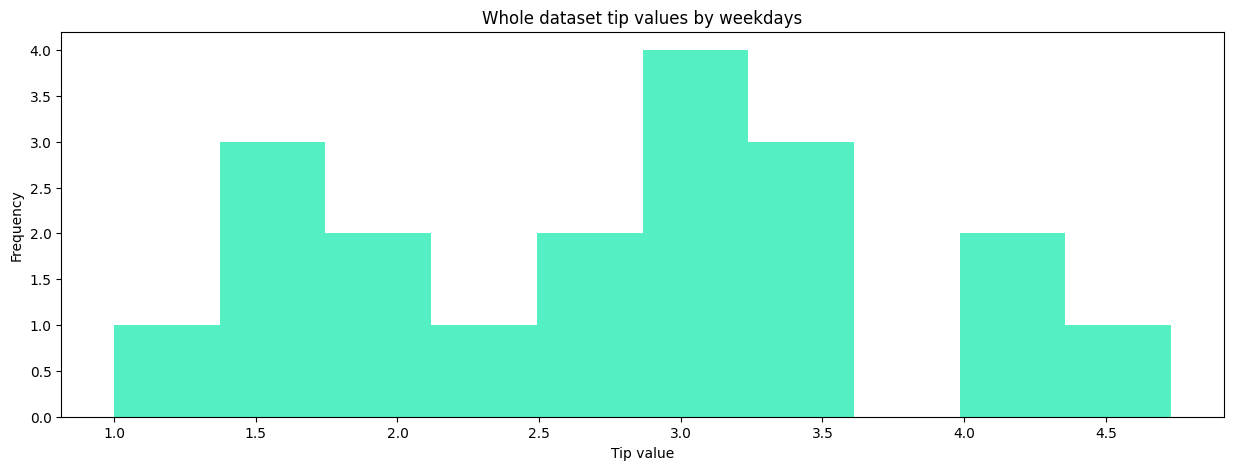

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    weekdays_df['tip'],
    bins=10,
    color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values by weekdays')

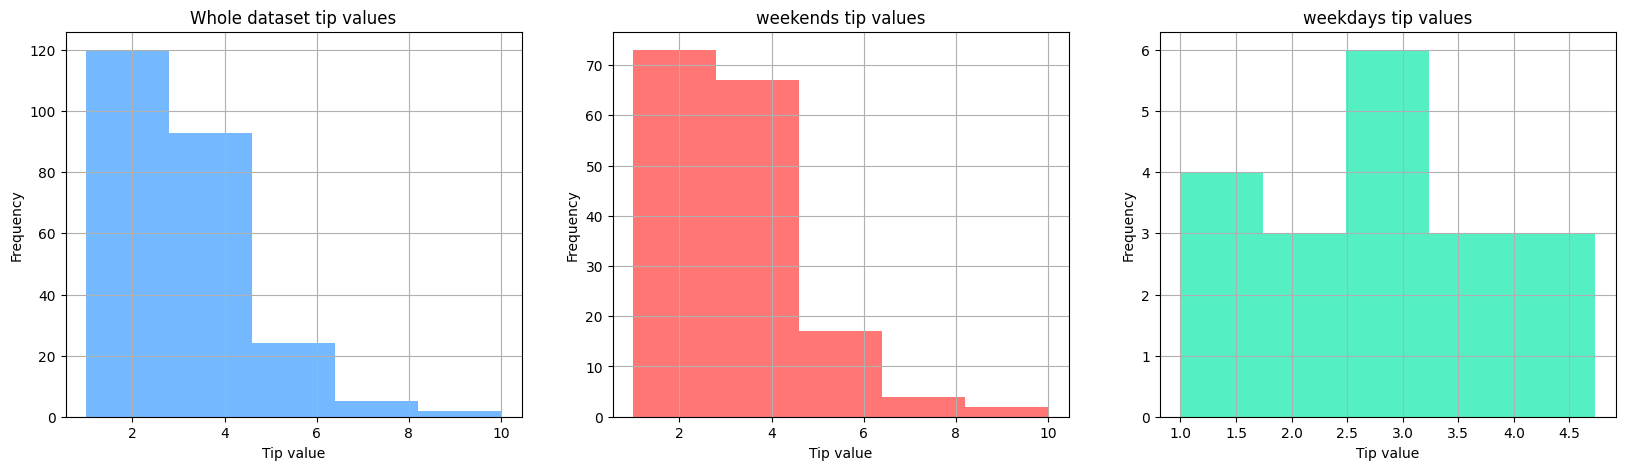

In [ ]:
figure, axis = plt.subplots(1,3,figsize=(20,5))
axis[0].hist(df['tip'],bins=5,color='#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[1].hist(weekends_df['tip'],bins=5,color='#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('weekends tip values')
axis[1].grid(True)
axis[2].hist(weekdays_df['tip'],bins=5,color='#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('weekdays tip values')
axis[2].grid(True)
plt.show()

In [ ]:
data_group1=weekends_df['tip']
data_group2=weekdays_df['tip']
st.ttest_ind(data_group1,data_group2,equal_var=True)

TtestResult(statistic=1.1028993019409794, pvalue=0.27154326510606286, df=180.0)

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---
Based on the T-test between weekends and weekdays, we have the result that pvalue = 0.27 > 0.05. We can conclude that these two groups of customers do not have much difference in the amount of tips for restaurant's service staff.

**General conclusion:**

Through the table of min, max, average parameters and the distribution image, we see that: The weekend's customers usually tip more than weekday's customers.But there isn't significant difference

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [ ]:
df['time'].unique()

<StringArray>
['Dinner', 'Lunch']
Length: 2, dtype: string

In [ ]:
dinner_df=df[df['time']=='Dinner']
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
111,111,7.25,1.0,Female,No,Sat,Dinner,1
42,42,13.94,3.06,Male,No,Sun,Dinner,2
106,106,20.49,4.06,Male,Yes,Sat,Dinner,2
28,28,21.7,4.3,Male,No,Sat,Dinner,2
75,75,10.51,1.25,Male,No,Sat,Dinner,2


In [ ]:
dinner_tip_min=dinner_df['tip'].min()
dinner_tip_max=dinner_df['tip'].max()
dinner_tip_mean=dinner_df['tip'].mean()
dinner_tip_median=dinner_df['tip'].median()

In [ ]:
dinner_values=[dinner_tip_min,dinner_tip_max,dinner_tip_mean,dinner_tip_median]
dinner_values=map(lambda x:round(x,4),dinner_values)
dinner_mct=pd.DataFrame(dinner_values,index=['min','max','mean','median'])
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


In [ ]:
lunch_df=df[df['time']=='Lunch']
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
145,145,8.35,1.5,Female,No,Thur,Lunch,2
147,147,11.87,1.63,Female,No,Thur,Lunch,2
204,204,20.53,4.0,Male,Yes,Thur,Lunch,4
223,223,15.98,3.0,Female,No,Fri,Lunch,3
198,198,13.0,2.0,Female,Yes,Thur,Lunch,2


In [ ]:
lunch_tip_min=lunch_df['tip'].min()
lunch_tip_max=lunch_df['tip'].max()
lunch_tip_mean=lunch_df['tip'].mean()
lunch_tip_median=lunch_df['tip'].median()

In [ ]:
lunch_values=[lunch_tip_min,lunch_tip_max,lunch_tip_mean,lunch_tip_median]
lunch_values=map(lambda x:round(x,4),lunch_values)
lunch_mct=pd.DataFrame(lunch_values,index=['min','max','mean','median'])
lunch_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'lunch': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median}
}
all_mct = pd.DataFrame(all_vals_dict)
all_mct

,Common,dinner,lunch
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


##### **📝 Conclusion**

**Insights based on measures of central tendency comparison:**

---
Based on the measure :
1.   The max tip value is dinner. It's 10USD
2.   The average tip value: The dinner is higher than lunch
**General conclusion:**
**The dinner usually give tip higher lunch**

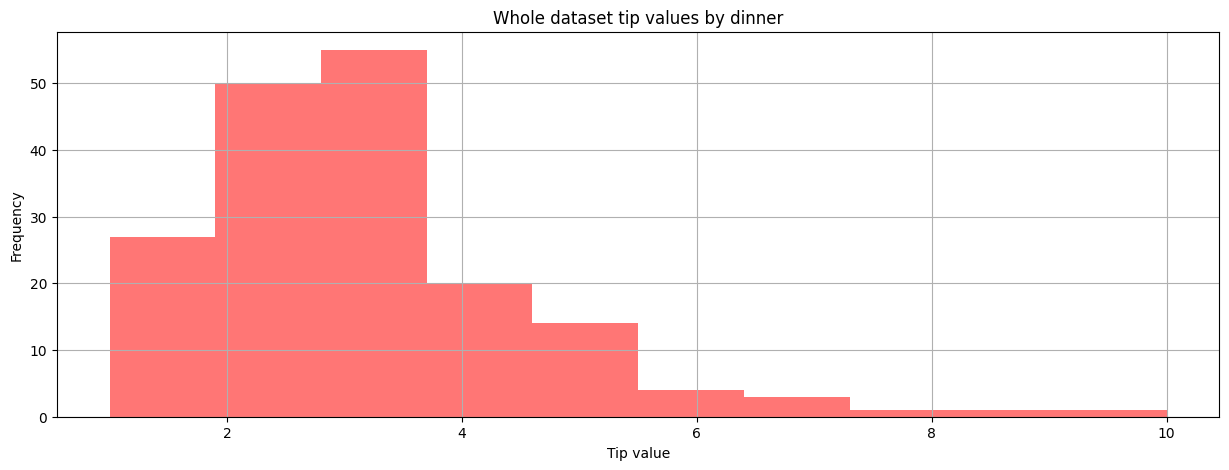

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    dinner_df['tip'],
    bins=10,
    color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values by dinner')
plt.grid(True)

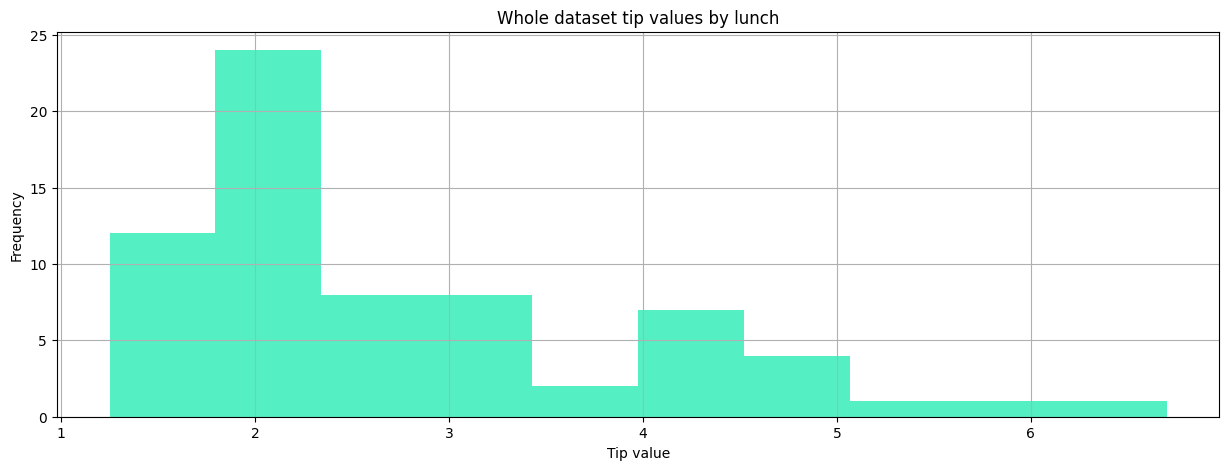

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(
    lunch_df['tip'],
    bins=10,
    color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values by lunch')
plt.grid(True)

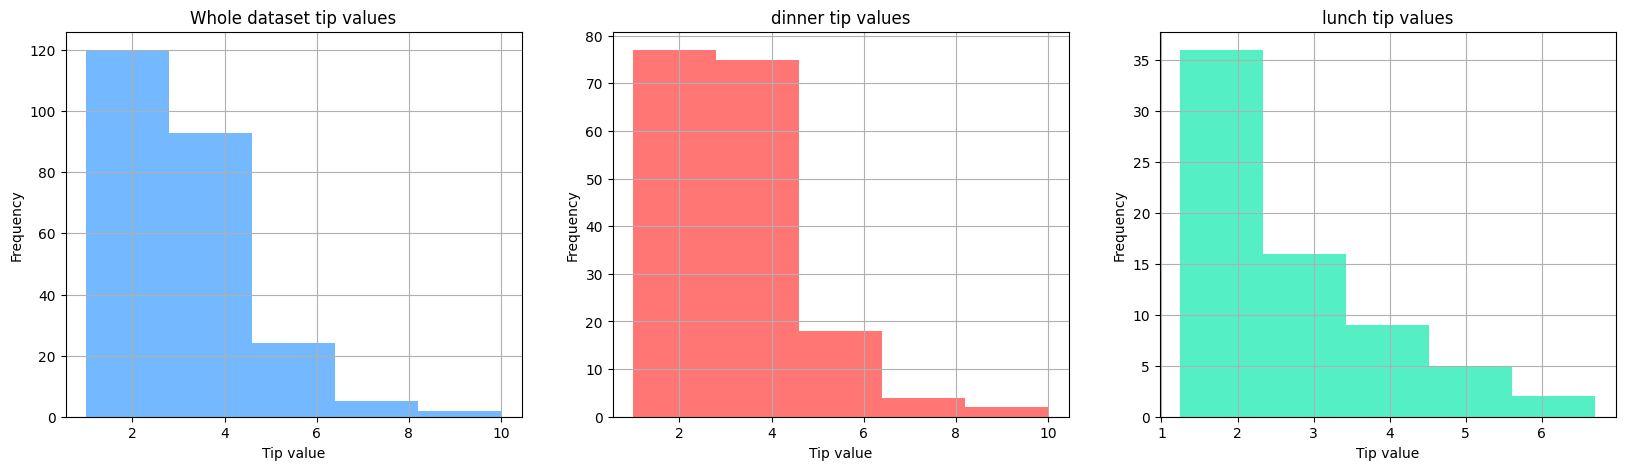

In [ ]:
figure, axis = plt.subplots(1,3,figsize=(20,5))
axis[0].hist(df['tip'],bins=5,color='#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[1].hist(dinner_df['tip'],bins=5,color='#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('dinner tip values')
axis[1].grid(True)
axis[2].hist(lunch_df['tip'],bins=5,color='#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('lunch tip values')
axis[2].grid(True)
plt.show()

In [ ]:
data_group1=dinner_df['tip']
data_group2=lunch_df['tip']
st.ttest_ind(data_group1,data_group2,equal_var=True)

TtestResult(statistic=1.9062569301202392, pvalue=0.05780153475171558, df=242.0)

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---
Based on the T-test between dinner and lunch, we have the result that pvalue = 0.0578 > 0.05. We can conclude that these two groups of customers do not have much difference in the amount of tips for restaurant's service staff.

**General conclusion:**

Through the table of min, max, average parameters and the distribution image, we see that: The dinner group usually tip more than lunch group. But there isn't significant difference